In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mylibrary.nnlib as tnn
import mylibrary.splinelib as tsp

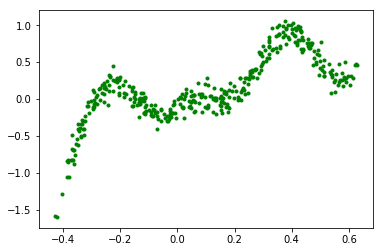

In [16]:
x = np.linspace(0,1,400)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y = (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.4 #x.mean() # good practice to zero-center x in linear mapping
sortindx = np.argsort(x)
x = x[sortindx]
y = y[sortindx]
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)
plt.scatter(x, y, marker='.', color='g')

In [21]:
max_points = 5
lr=0.1
spline = tsp.Spline1D(max_points, x, y)

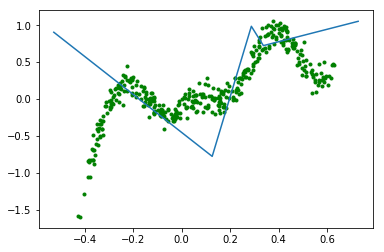

In [22]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.plot(spline.X, spline.Y)

_______________________
Steps 0
Error 0.2533420377706797


_______________________
Steps 100
Error 0.08294070340298236


_______________________
Steps 200
Error 0.05723996775660664


_______________________
Steps 300
Error 0.050548674729099165


_______________________
Steps 400
Error 0.05013267126413238


_______________________
Steps 500
Error 0.050002263449816356


_______________________
Steps 600
Error 0.018201774364812497


_______________________
Steps 700
Error 0.01751698883990398


_______________________
Steps 800
Error 0.017473397620337477


_______________________
Steps 900
Error 0.017471887612968348


_______________________
Steps 1000
Error 0.017471800819162907


_______________________
Steps 1100
Error 0.017471795819954658


_______________________
Steps 1200
Error 0.017471795532580332


_______________________
Steps 1300
Error 0.01747179551606882


_______________________
Steps 1400
Error 0.01747179551512023


_______________________
Steps 1500
Error 0.01747179551506573

TclError: invalid command name "pyimage80"

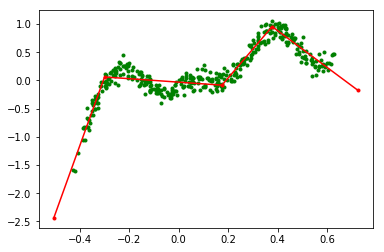

In [23]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

for step in range(10000):

    Y = spline.forward(x)
    dy = Y-y
    dx = spline.backward(dy)
    spline.update(lr)
    
    if step % 100 == 0:
        spline._remove_close_points_()
        spline._combine_linear_points_()
        spline._remove_no_input_points_()
        spline._add_new_point_()
        
    if step % 100 == 0:            
        error = (dy**2).mean()
        print('_______________________')
        print("Steps", step)
        print("Error", error)
        
        ax.clear()
        plt.scatter(x, y, marker='.', color='g')
        plt.plot(spline.X, spline.Y, marker='.', color='r')
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            plt.pause(50)
            break

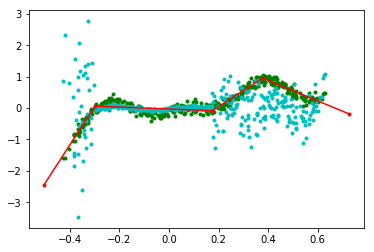

In [24]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.plot(spline.X, spline.Y, marker='.', color='r')
plt.scatter(x, dx, marker='.', color='c')

## Using inverse function without optimization(after initialization)

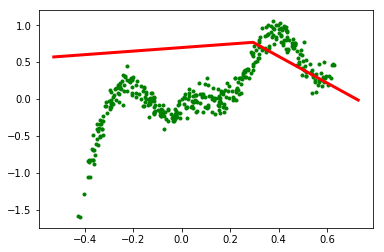

In [31]:
max_points = 3
lr=0.1
spline = tsp.Spline1D(max_points, x, y)
plt.scatter(x, y, marker='.', color='g')
plt.plot(spline.X, spline.Y, color='r', lw=3)

In [32]:
Y = spline.forward(x)
dy = Y-y
dx = spline.backward(dy)

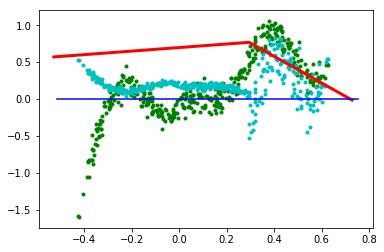

In [37]:
plt.scatter(x, y, marker='.', color='g')
plt.plot(spline.X, spline.Y, color='r', lw=3)
plt.scatter(x, dx, marker='.', color='c')
plt.plot(x*1.2, np.zeros_like(x), color='b')

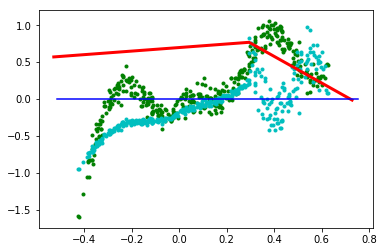

In [42]:
plt.scatter(x, y, marker='.', color='g')
plt.plot(spline.X, spline.Y, color='r', lw=3)
plt.scatter(x, x-dx, marker='.', color='c')
plt.plot(x*1.2, np.zeros_like(x), color='b')

## Reverse Function 

In [38]:
def reverse0(self:tsp.Spline1D, y):
    x = np.zeros_like(self.input)
    for i in range(self.n_points-1):
        xpossible = self.diffX[i]/self.diffY[i] *(y - self.Y[i]) + self.X[i]
        x += xpossible*self.rangeX[i]
    return x

 ### Reverse using the output

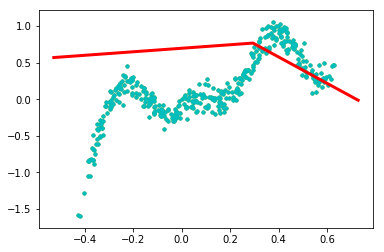

In [43]:
x_ = reverse0(spline, Y)
plt.scatter(x, y, marker='.', color='g')
plt.plot(spline.X, spline.Y, color='r', lw=3)
plt.scatter(x_, y, marker='.', color='c')

### Reverse using the target

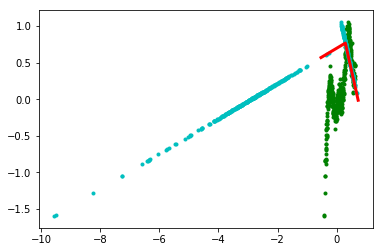

In [40]:
x_ = reverse0(spline, y)
plt.scatter(x, y, marker='.', color='g')
plt.plot(spline.X, spline.Y, color='r', lw=3)
plt.scatter(x_, y, marker='.', color='c')

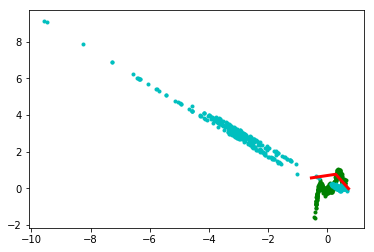

In [41]:
dx_ = x - x_ ## xn = xo - dx
plt.scatter(x, y, marker='.', color='g')
plt.plot(spline.X, spline.Y, color='r', lw=3)
plt.scatter(x_, dx_, marker='.', color='c')